In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pf=pd.read_csv("Mall_Customers.csv")
pf.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X=pf.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

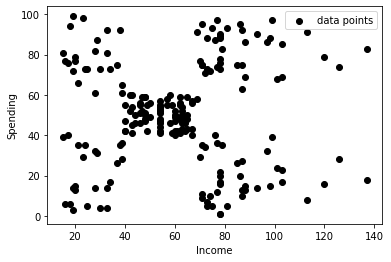

In [8]:
plt.scatter(X[:,0],X[:,1],color='black',label='data points')
plt.xlabel("Income")
plt.ylabel("Spending")
plt.legend()
plt.show()

In [10]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
print(wcss)

[269981.28000000014, 182440.30762987016, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 31248.853151807467, 25043.970949607206, 22918.04056247815, 19664.68519600554]


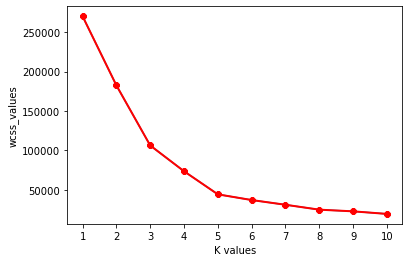

In [12]:
plt.figure()
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K values')
plt.xticks(np.arange(1,11))
plt.ylabel('wcss_values')
plt.show()

use elbow point as optimum cluster size is determined by it
here the elbow point is 5

In [15]:
df1=pf[["Annual Income (k$)","Spending Score (1-100)"]]
X=df1
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [17]:
km1=KMeans(n_clusters=5)
km1.fit(X)
y=km1.predict(x)
df1["label"]=y
df1

/tmp/ipykernel_3789/3285560636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["label"]=y


,Annual Income (k$),Spending Score (1-100),label
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,0
196,126,28,2
197,126,74,0
198,137,18,2


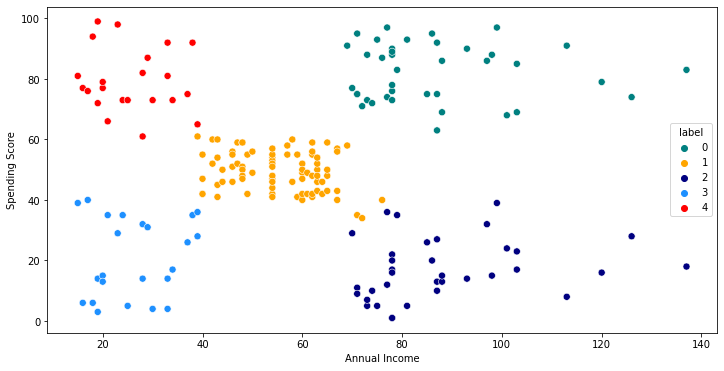

In [27]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue="label"
                ,palette=['teal','orange','navy','dodgerblue','red'],data=X,s=50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()